# **Analyse des Sentiments / Sentiment Analysis**

## **1. Introduction**

Dans le monde actuel, les plateformes sociales telles que Reddit et Twitter offrent un miroir des émotions et des états de santé mentale des utilisateurs. L'analyse des sentiments, qui permet d'identifier si un texte exprime un sentiment positif, négatif ou neutre, est un outil puissant pour comprendre et quantifier ces émotions à grande échelle.

Ce projet vise à analyser des déclarations liées à la santé mentale à l'aide de plusieurs approches d'apprentissage automatique et profond. Les principaux objectifs incluent :  

1. L’analyse des sentiments avec **TextBlob**, pour mesurer la polarité (positif/négatif) et la subjectivité (opinion vs fait).  
2. L’entraînement de modèles de machine learning avancés, notamment **XGBoost**, **Random Forest** et **régression logistique**, pour classifier les états de santé mentale.  
3. L’intégration d’un modèle de deep learning basé sur les embeddings **GloVe** pré-entraînés, pour une analyse approfondie et une meilleure compréhension des nuances textuelles.

L’ensemble de données étudié contient des déclarations étiquetées selon des conditions de santé mentale telles que :  
- Normal  
- Dépression  
- Suicidal  
- Anxiété  
- Stress  
- Trouble bipolaire  
- Trouble de la personnalité  


## **2. Architecture Technologique**

### **2.1 Langage de Programmation**
- **Python** : Langage principal pour l'analyse de données et la modélisation machine learning

### **2.2 Traitement et Analyse de Données**
- **Bibliothèques de Manipulation de Données**
  - **Pandas** : Manipulation et analyse de dataframes
  - **NumPy** : Calculs numériques et opérations matricielles

### **2.3 Traitement Textuel et Analyse Sémantique**
- **Bibliothèques NLP**
  - **NLTK** : Traitement linguistique de base
  - **spaCy** : Analyse linguistique avancée
  - **TextBlob** : Analyse de sentiments et opérations textuelles
- **Embeddings**
  - **GloVe** : Représentation vectorielle des mots

### **2.4 Machine Learning & Apprentissage Automatique**
- **Scikit-learn** : Framework de référence pour machine learning
  - Algorithmes implémentés :
    - **XGBoost**
    - **Random Forest**
    - **Bernoulli Naive Bayes**
    - **Régression Logistique**
- **Outils Complémentaires**
  - **Imbalanced-learn** : Gestion des datasets déséquilibrés
  - **SMOTE** : Technique de sur-échantillonnage

### **2.5 Deep Learning**
- Frameworks de Deep Learning
  - **TensorFlow**
  - **PyTorch**
- Architectures Potentielles
  - Réseaux de Neurones Récurrents (RNN)
  - LSTM
  - Transformers

### **2.6 Visualisation de Données**
- **Matplotlib** : Graphiques et visualisations de base
- **Seaborn** : Visualisations statistiques avancées
- **Plotly** : Visualisations interactives

### **2.7 Mise en Production**
- **Outils de Développement**
  - **PyCharm** : Environnement de développement intégré
  - **Docker** : Conteneurisation et déploiement
- **Développement Backend**
  - **Frameworks API** : Flask ou FastAPI
- **Techniques de Déploiement**
  - **Sklearn Pipeline** : Chaîne de prétraitement et prédiction
  - **Serialization** : Sauvegarde et chargement de modèles

### **Objectif Global**
Ce projet combinera des approches traditionnelles et modernes pour maximiser l’efficacité de la classification et explorer les émotions exprimées à travers le langage. Enfin, nous simulerons la mise en production du modèle ayant les meilleures performances afin de démontrer son applicabilité dans des cas réels.

In [66]:
# ====================== CONFIGURATION GÉNÉRALE ======================
# Importations de base
import os
import re
import warnings
import logging
from collections import Counter

# Suppression des warnings
warnings.filterwarnings("ignore")

# Configuration pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# ====================== ANALYSE DE DONNÉES ======================
# Manipulation de données
import numpy as np
import string

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# ====================== TRAITEMENT DU LANGAGE NATUREL (NLP) ======================
# NLTK
import nltk
from nltk.corpus import stopwords, words, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Configuration NLTK
logging.getLogger("nltk").setLevel(logging.CRITICAL)
nltk.download('stopwords', quiet=True)
nltk.download('words', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

# Autres outils de traitement de texte
import contractions
import nlpaug.augmenter.word as naw

# ====================== MACHINE LEARNING ======================
# Prétraitement
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

# Modélisation
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV,
    StratifiedKFold, cross_val_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from scipy.stats import uniform

# Métriques
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_recall_curve, recall_score
)

# Pipeline et transformation
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Gestion du déséquilibre des classes
from imblearn.over_sampling import SMOTE

# ====================== DEEP LEARNING ======================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Flatten, Dense,
    Dropout, LSTM, GRU, Conv1D
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ====================== SÉRIALISATION ======================
import pickle


## ETAPE 1: Chargement des données

In [21]:
# Chargement des données

os.chdir("C:/Users/claud/Documents/Machine learning MIT/Sentiment Analysis")
raw_df = pd.read_csv("Combined Data.csv", encoding='utf-8') 
df = raw_df.copy() # Copier les données brutes

In [16]:
df.sample(frac=1).head(3) # Sélectionner aléatoirement les 3 premiere lignes du jeu de donnée 

Unnamed: 0  \
19776       19776   
32762       32762   
1640         1640   

                                                                                                                                                      statement  \
19776  honestly I do not want to be here anymore, i am not living, I am tired. I am losing weight losing self love. just constantly falling. detached from life   
32762                                                                                                                              no. it costs too much money.   
1640                                          Early in the morning, after the duck ride, I want to share this CPO chart, it looks interesting #chart #mbahnasip   

           status  
19776  Depression  
32762      Normal  
1640       Normal

In [22]:
# Infos sur les colonnes  des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [23]:
# Suprimé la colonne Unnamed et les valeurs manquantes

df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.dropna()
df.reset_index(drop=True, inplace=True) # Réinitialiser l'index pour éviter les sauts dans l'index

In [24]:
# comptage du nombre de mots dans la colonne sentiments avant le netoyage des données brutes

# Fonction pour compter le nombre total de mots
def total_word_count(column):
    return column.apply(lambda x: len(x.split()) if isinstance(x, str) else 0).sum()

# Calcul du nombre total de mots avant l'enlévement des mots vides (stop word)

total_words_before = total_word_count(df['statement'])
print(f"Nombre total des mots avant le netoyage est de: {total_words_before}")

Nombre total des mots avant le netoyage est de: 5961315


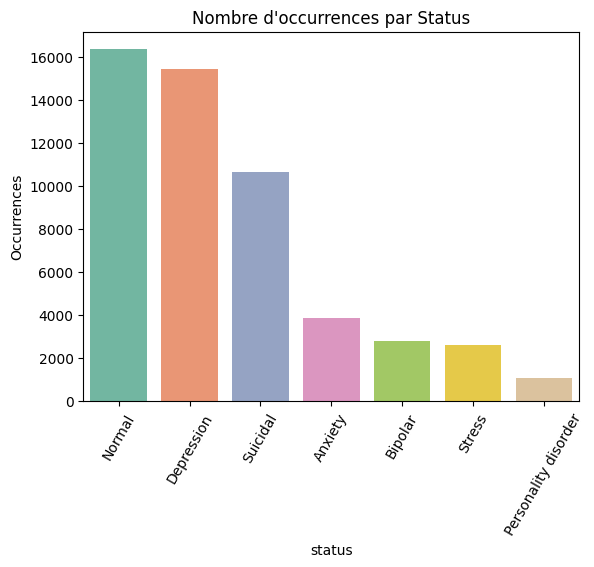

In [25]:
# Barplot de la distribution des classes des données brutes

# Calcul des occurrences des catégories
sentiments_counts = df['status'].value_counts()

# Création du barplot

sns.barplot(x=sentiments_counts.index, y=sentiments_counts.values, hue=sentiments_counts.index, palette="Set2", legend=False)
plt.title("Nombre d'occurrences par Status")  # Titre
#plt.xlabel("Statut")  # Étiquette axe X
plt.ylabel("Occurrences")  # Étiquette axe Y
plt.xticks(rotation=60) # Retourner les labels de 60 dégrée
plt.show()

***Déséquilibre dans la distribution des classes. Ce problème peut considérablement affecter  les performances des modèles de machine learning..***

## ETAPE 2: Text Preprocessing

In [26]:
# Fonction de prétraitement: Appliquer les etapes de traitement de text dans une seule fonction

def preprocess_text(df, text_column):
    STOPWORDS = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Convertir la colonne en chaîne 
    df[text_column] = df[text_column].astype(str)
    
    # Étendre les contractions
    df[text_column] = df[text_column].apply(contractions.fix)
    
    # Supprimer les chiffres
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'\d+', '', x))
    
    # Convertir en minuscule
    df[text_column] = df[text_column].str.lower()
    
    # Supprimer les balises HTML
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'<.*?>', ' ', x))
    
    # Supprimer les ponctuations et caractères spéciaux
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    
    # Tokenization et Lemmatization
    df[text_column] = df[text_column].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
    
    # Supprimer les stopwords
    df[text_column] = df[text_column].apply(lambda x: " ".join([word for word in x.split() if word not in STOPWORDS]))
    
    # Supprimer les espaces multiples
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
    
    return df

# Appliquer la fonction de pretraitement a notre dataframe brute
df = preprocess_text(df, 'statement')

In [27]:
# Visualiser les données traités
df.head(2)

statement   status
0                                             oh gosh  Anxiety
1  trouble sleeping confused mind restless heart tune  Anxiety

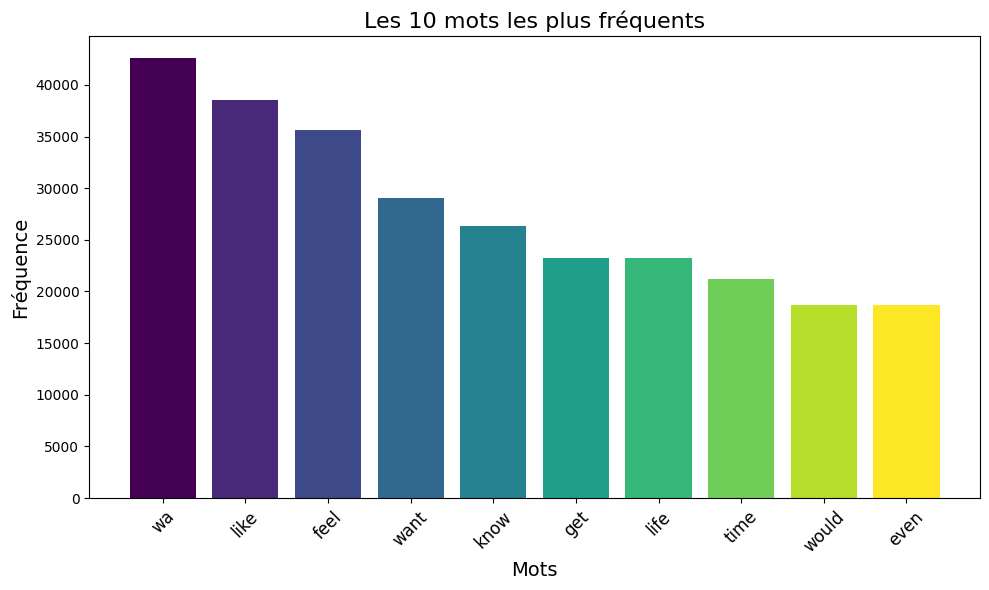

In [28]:
# Visualiser les mots fréquents du jeu de donnée nettoyé

from collections import Counter
word_count = Counter()
for text in df['statement']:
    for word in text.split():
        word_count[word] += 1
            
# Obtenir les 10 mots les plus fréquents
most_common_words = word_count.most_common(10)

# Séparer les mots et leurs fréquences
words, counts = zip(*most_common_words)

# Créer une palette de couleurs (en utilisant un colormap)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

# Créer un barplot avec des couleurs variées
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=colors)
plt.title("Les 10 mots les plus fréquents", fontsize=16)
plt.xlabel("Mots", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()



In [29]:
# Retirer ses 10 mots fréquents

FREQUENT_WORD = set(word for (word, wc) in word_count.most_common(10)) # Définir l'ensemble des mots fréquents

# Fonction pour retirer les mots fréquents
def remove_freq_word(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORD])

df['statement'] = df['statement'].apply(remove_freq_word) # ppel de la fonction


In [30]:
# Supprimés les MOTS RARES

# Fonction pour supprimer les mots rares
def remove_rare_words_from_df(df, column_name, seuil=10):
    # Vérification que df est bien un DataFrame
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df doit être un DataFrame")

    # Compter la fréquence des mots dans le texte de la colonne spécifiée
    word_count_train = Counter()
    for text in df[column_name]:
        for word in text.split():
            word_count_train[word] += 1
    
    # Extraire les mots rares ayant une fréquence inférieure au seuil
    rare_words = {word for word, count in word_count_train.items() if count < seuil}
    
    # Supprimer les mots rares dans le dataframe
    def remove_rare_words(text):
        return ' '.join([word for word in text.split() if word not in rare_words])
    
    # Appliquer la fonction de suppression des mots rares
    df[column_name] = df[column_name].apply(remove_rare_words)
    
    return df, rare_words

# Appel de la fonction de suppression des mots rares
df, rare_words = remove_rare_words_from_df(df, 'statement', seuil=10)

In [31]:
# Retirer les mots generiques

# Define a set of generic words to remove
NEW_GENERIC_WORDS = {'people', 'year', 'day', 'really', 'think', 'go', 'make', 'much', 'could', 'anymore', 'work'}

# Function to remove generic words
def remove_generic_words(text):
    return ' '.join([word for word in text.split() if word not in NEW_GENERIC_WORDS])

# Apply the function to your DataFrame
df['statement'] = df['statement'].apply(remove_generic_words)

In [32]:
# Fonction pour supprimer les mots de moins de 4 lettres

def supprimer_mots_courts(texte):
    # Supprime les mots de moins de 4 lettres
    texte = re.sub(r'\b\w{1,3}\b', '', texte)
    # Supprime les espaces multiples
    return re.sub(r'\s+', ' ', texte).strip()

# Appliquer la fonction sur la colonne statement
df["statement"] = df["statement"].apply(supprimer_mots_courts)

In [33]:
# Fonction pour compter le nombre total de mots 
def total_word_count(column):
    return column.apply(lambda x: len(x.split()) if isinstance(x, str) else 0).sum()

# Calcul du nombre total de mots aprés l'enlevement des mots vides
total_words_after = total_word_count(df['statement'])
print(f"Nombre total de mots aprés le netoyage: {total_words_after}")

Nombre total de mots aprés le netoyage: 1891763


**Nous sommes passé d'un jeu de donnée de 5961315 mots a un jeu de donnée de 1891763 mots**

In [34]:
# Distribution des classe aprés traitement 
print(df.status.value_counts(dropna=False))
print(df.shape)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64
(52681, 2)


**Malgré les traitements préliminaires, un déséquilibre persistant des classes subsiste dans la variable 'status', nécessitant la mise en œuvre de techniques spécifiques pour garantir la performance du modèle de classification.**

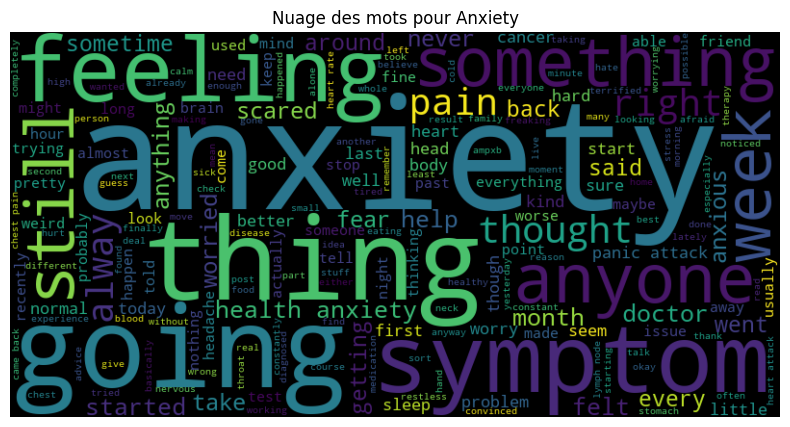

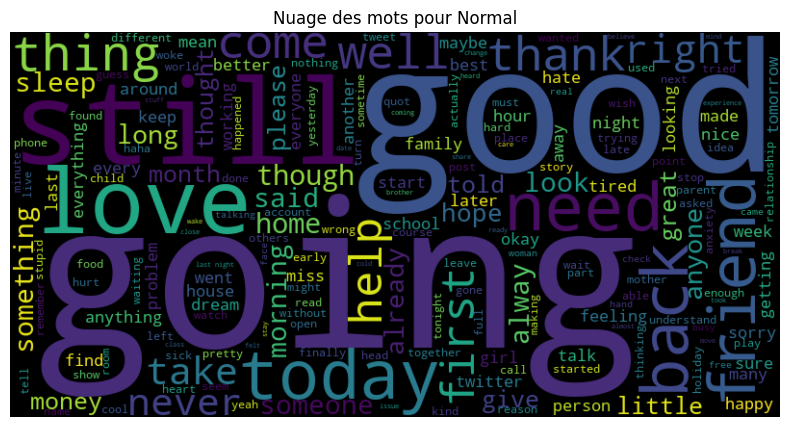

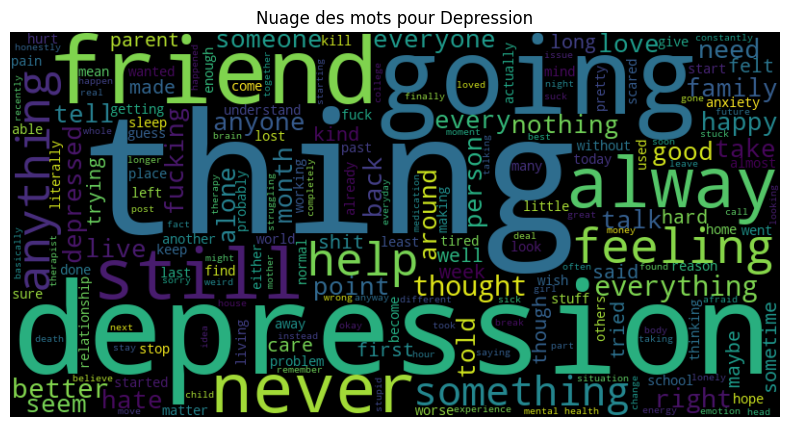

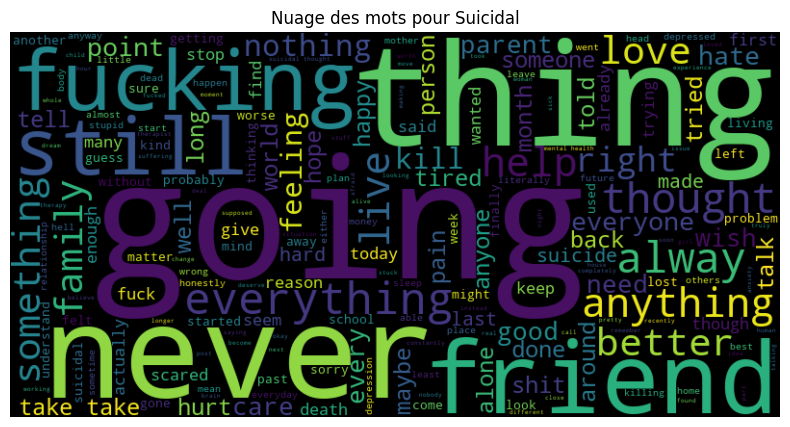

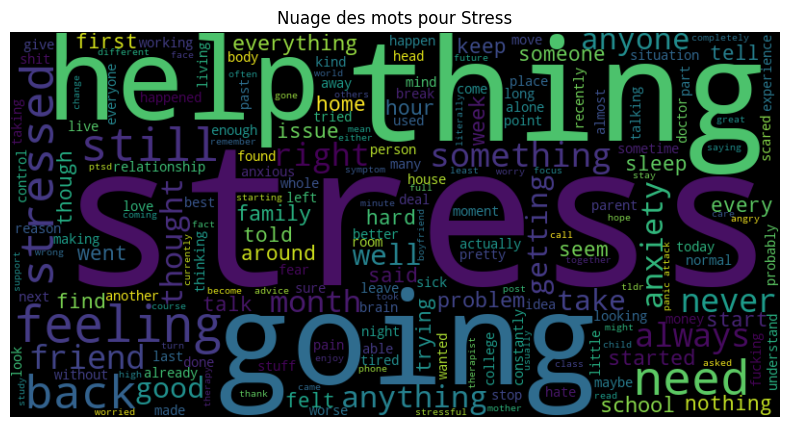

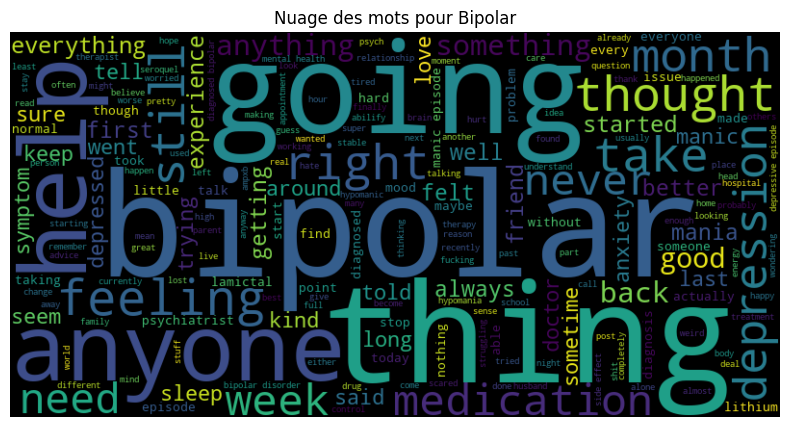

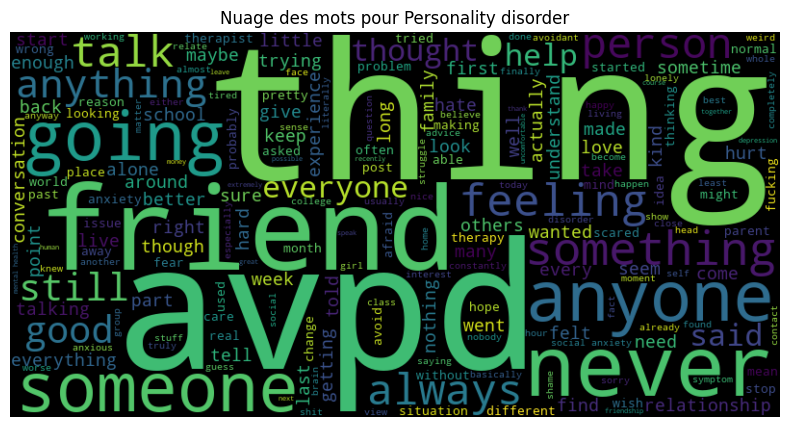

In [35]:
# Afficher le nuage des mots des differentes classe

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

statuses = df['status'].unique()

for status in statuses:
    status_text = ' '.join(df[df['status'] == status]['statement'])
    generate_word_cloud(status_text, title=f'Nuage des mots pour {status}')

In [37]:
# Creation des copies du jeu de donnée traité

df_Textbolb = df.copy() # Pour le model avec Textblob
df_DeepLearning = df.copy() # Pour le model avec réseau de neurone et model d'embedding pré-traité (glove)
df_class = df.copy() # Pour les models de classification

## 1. CLASSIFICATION: 

 
Pour classifier nos textes, nous utiliserons plusieurs modèles de machine learning, notamment :  
- **Forêt aléatoire (Random Forest)**  
- **XGBoost**  
- **Régression logistique**  
- **Bernoulli Naïve Bayes**  
  
Pour pallier le déséquilibre des classes, nous adopterons plusieurs stratégies :  
- **Ajustement des poids des classes** : soit en les calculant manuellement, soit en laissant l’algorithme les ajuster automatiquement via `class_weight='balanced'`.  
- **Utilisation de SMOTE** : pour générer des échantillons synthétiques et équilibrer la distribution des classes.  
- **Augmentation de texte** : en utilisant une technique basée sur les synonymes pour enrichir les données et améliorer la robustesse des modèles.  

L’optimisation des hyperparamètres ne sera pas détaillée ici. Nous appliquerons directement les meilleures configurations trouvées via **RandomSearch** ou **GridSearch**.  


Pour garantir une évaluation fiable, nous diviserons notre jeu de données en deux parties :

- L’ensemble d’entraînement, sur lequel seront appliquées toutes les techniques d’équilibrage.
- L’ensemble de test, qui restera intact et servira uniquement à évaluer la performance des modèles. Cette séparation stricte permettra d’éviter toute fuite de données (data leakage).
  
L’évaluation se fera à l’aide de la **validation croisée stratifiée** et des métriques adaptées aux données déséquilibrées :  
- **F1-score**  
- **Précision**  
- **Rappel**  



In [67]:
# Avant toute procédure divisons le jeu de donnée pour éviter les biais lors de l'entrainement

X_train, X_test, y_train, y_test = train_test_split(
    df_class['statement'],     # Les caractéristiques ou variables explicatives (matrice X)
    df_class['status'],        # La cible ou variable à prédire (colonne y)
    test_size=0.2,            # Fraction des données utilisées pour l'ensemble de test
    random_state=1,           # Graine pour reproductibilité
    stratify = df_class['status']  # Assurer la même proportion de classes dans chaque ensemble que l'original
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42144,)
(42144,)
(10537,)
(10537,)


In [69]:
# Créer un dataframe avec les valeurs de X_train et y_train

train_df = pd.DataFrame(X_train, columns=['statement'])

# Ajouter y_train comme une colonne
train_df['status'] = y_train

# Afficher le DataFrame résultant
train_df.sample(2)

statement  \
4438                                                     seriously classmate invite group asked answer read already   
13575  used bird everything cool stuff real high dive straight ground maybe always wanted nowadays different reason   

           status  
4438       Normal  
13575  Depression

In [70]:
# Retrouvé la ligne 15572 dans le df_original pour verifié que le nouveau df_train est correct
df.loc[4438]

statement    seriously classmate invite group asked answer read already
status                                                           Normal
Name: 4438, dtype: object

In [71]:
print(train_df.status.value_counts())
print("------------------------------------")
print(train_df.shape)

status
Normal                  13074
Depression              12323
Suicidal                 8521
Anxiety                  3073
Bipolar                  2221
Stress                   2070
Personality disorder      862
Name: count, dtype: int64
------------------------------------
(42144, 2)


**Nous remarquons que le déséquilibre est visible également dans le jeu de donnée d'entrainement**

In [72]:
# Carracteristique de la longueur de nos text

train_df['sentence_length'] = train_df['statement'].apply(lambda x: len(str(x).split()))
fig = px.histogram(train_df, x='sentence_length', title=' Distribution de la longeur des texte')
fig.show()
print(train_df.sentence_length.describe())
print('---------------------------------------------')
print(train_df.isnull().sum())
print(train_df.shape)

count    42144.000000
mean        35.695876
std         51.834750
min          0.000000
25%          5.000000
50%         20.000000
75%         46.000000
max       1837.000000
Name: sentence_length, dtype: float64
---------------------------------------------
statement          0
status             0
sentence_length    0
dtype: int64
(42144, 3)


In [73]:
#Augmentation des classes minoritaire (methode des synonymes)

import nlpaug.augmenter.word as naw
import pandas as pd

# Initialiser l'augmenter de synonymes
aug = naw.SynonymAug(aug_src='wordnet')

# Identifier les classes minoritaires
minority_classes = ['Personality disorder', 'Anxiety', 'Stress']
df_minority = train_df[train_df['status'].isin(minority_classes)]

# Traiter par lots (batches)
batch_size = 32  
augmented_texts = []

# Traitement par lots pour les classes minoritaires
for i in range(0, len(df_minority), batch_size):
    batch = df_minority['statement'][i:i + batch_size].tolist()  # Prendre un lot de textes
    augmented_batch = aug.augment(batch)  # Appliquer l'augmentation de synonymes sur le lot
    augmented_texts.extend(augmented_batch)  # Ajouter les textes augmentés à la liste

# Créer un DataFrame avec les données augmentées
augmented_df = df_minority.copy()
augmented_df['statement'] = augmented_texts  

# Fusionner les données augmentées avec les données d'origine
df_augmented = pd.concat([train_df, augmented_df], ignore_index=True)

# Mélanger les données après l'augmentation
df_augmented = df_augmented.sample(frac=1).reset_index(drop=True)
df_augmented = df_augmented[df_augmented['statement'] != ''] # Supprimé les lignes ou le commentaire est vide

In [74]:
# Afficher le dataframe augmneté

print(df_augmented.shape)
df_augmented.head(2)

(46973, 3)


statement      status  sentence_length
0  tired waiting home      Normal                3
1   depression garden  Depression                2

**Aprés augmentation des classes minoritaire , le dataframe est passé de 42144 entrées a 46973 entrées. ceci prouve que les données ont augmentées**

In [75]:
# Fonction pour calculer les poids des classes ( pour faire passer ça comme parametre dns les modéles)

def compute_weight(df, target):
    values = target.unique()  # Obtenir les valeurs uniques dans target (les classes)
    n_classes = target.nunique()  # Nombre de classes uniques
    n_samples = df.shape[0]  # Nombre total d'échantillons  
    class_weights = {}  # Dictionnaire pour stocker les poids
    
    for value in values:
        class_samples = target[target == value].shape[0]  # Nombre d'échantillons pour la classe 'value'
        class_weight = round(n_samples / (n_classes * class_samples), 2)  # Calcul du poids
        class_weights[value] = class_weight  # Ajout au dictionnaire
    
    return class_weights

# Calcul des poids de classe
from sklearn.utils.class_weight import compute_sample_weight
class_weights = compute_weight(df_augmented, df_augmented['status'])

# Calcul des poids des échantillons pour XGBoost
sample_weights = compute_sample_weight(class_weight='balanced', y = df_augmented['status'])  # Calcul des poids pour chaque échantillon
sample_weights = sample_weights.astype(float)  # Conversion en format float (utile pour éviter des erreurs)

# Affichage des poids
print("Class weights:", class_weights)
print("Scale_pos_weight:", sample_weights)


Class weights: {'Normal': 0.56, 'Depression': 0.55, 'Anxiety': 1.09, 'Bipolar': 3.02, 'Suicidal': 0.79, 'Stress': 1.62, 'Personality disorder': 3.89}
Scale_pos_weight: [0.56097881 0.54534161 0.56097881 ... 0.79085782 0.54534161 0.79085782]


In [76]:
# Vectoriser les données textuelles avec la méthode de  TF-IDF (Term Frequency - Inverse Document Frequency)

vectorizer = TfidfVectorizer(
    max_features=10000,          # Limite à 10000 mots les plus informatifs
    ngram_range=(1, 2),         # Inclut des unigrammes et bigrammes
)

# Application du vectorizer aux données train
features = vectorizer.fit_transform(df_augmented['statement'])

# Convertir la matrice sparse en dense pour SMOTE
features = features.toarray()

print(f"Dimension de la matrice train TF-IDF : {features.shape}")

# Application du vectorizer aux données test
features_test = vectorizer.transform(X_test)

# Convertir la matrice sparse en dense pour SMOTE
features_test = features_test.toarray()

print(f"Dimension de la matrice test TF-IDF : {features_test.shape}")


Dimension de la matrice train TF-IDF : (46973, 10000)
Dimension de la matrice test TF-IDF : (10537, 10000)


In [79]:
# Utiliser SMOTE pour équilibrer d'avantage les classes dans le jeu de données d'entraînement

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(features, df_augmented['status'])

# Affichage des tailles pour vérifier les opérations
print("Taille de X_train avant SMOTE :", df_augmented.shape)
print("Taille de X_train après SMOTE :", X_train_balanced.shape)
print("Répartition des classes avant SMOTE :", df_augmented.status.value_counts())
print("Répartition des classes après SMOTE :", y_train_balanced.value_counts())

Taille de X_train avant SMOTE : (46973, 4)
Taille de X_train après SMOTE : (86135, 10000)
Répartition des classes avant SMOTE : status
Depression              12305
Normal                  11962
Suicidal                 8485
Anxiety                  6136
Stress                   4140
Bipolar                  2221
Personality disorder     1724
Name: count, dtype: int64
Répartition des classes après SMOTE : status
Normal                  12305
Depression              12305
Anxiety                 12305
Bipolar                 12305
Suicidal                12305
Stress                  12305
Personality disorder    12305
Name: count, dtype: int64


In [80]:
# Fonction d'évaluation du modéle

def metrics_score(actual, predicted, classes):
    # Générer le rapport de classification sous forme de DataFrame
    report = classification_report(actual, predicted, target_names=classes, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    return report_df

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
    plt.title('Matrice de confusion', fontsize=16)
    plt.ylabel('Valeurs réelles', fontsize=12)
    plt.xlabel('Valeurs prédites', fontsize=12)
    plt.show()


In [81]:
# Initialiser les différents model dans un dictionnaire.


# Encodée des labels uniquement pour XGBoost
label_encoder = LabelEncoder()
df_augmented['status_encoded'] = label_encoder.fit_transform(df_augmented['status'])
y_train_balanced = label_encoder.fit_transform(y_train_balanced)

# Différents Models
classifiers = {
    'Bernoulli Naive Bayes': BernoulliNB(alpha=0.1),
    'Random Forest': RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,  # Meilleur paramètre trouvé
        n_estimators=100,
        class_weight='balanced',
        random_state=101
    ),
    'Logistic Regression': LogisticRegression(
        C=1,
        max_iter=100,
        solver='liblinear',
        class_weight='balanced',
        random_state=101
    ),
    'XGB': XGBClassifier(
        scale_pos_weight=sample_weights,
        random_state=101
    )
}


Évaluation du modèle : Bernoulli Naive Bayes
Performance de Bernoulli Naive Bayes avec validation croisée (K-Fold=5) :
Scores obtenus : [0.65472804 0.6617519  0.65948801 0.65525048 0.65606316]
Moyenne des scores : 0.6575

--------------------------------------------------

                      precision    recall  f1-score      support
Anxiety                0.666667  0.557292  0.607092    768.00000
Normal                 0.578671  0.595324  0.586879    556.00000
Depression             0.628486  0.409607  0.495972   3081.00000
Suicidal               0.661155  0.941878  0.776937   3269.00000
Stress                 0.579545  0.474419  0.521739    215.00000
Bipolar                0.360544  0.410058  0.383710    517.00000
Personality disorder   0.510560  0.453778  0.480497   2131.00000
accuracy               0.605580  0.605580  0.605580      0.60558
macro avg              0.569376  0.548908  0.550404  10537.00000
weighted avg           0.600781  0.605580  0.587922  10537.00000


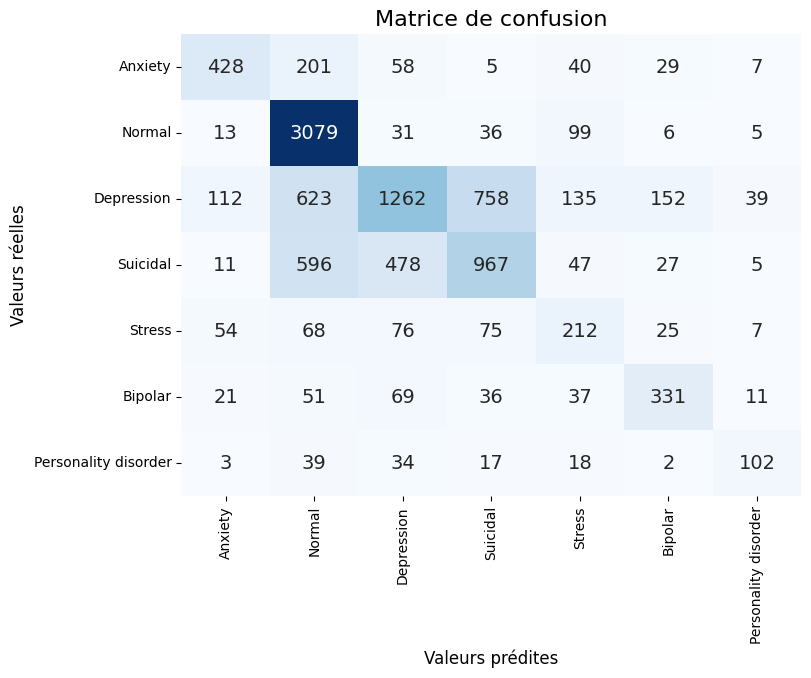

Évaluation du modèle : Random Forest
Performance de Random Forest avec validation croisée (K-Fold=5) :
Scores obtenus : [0.88187148 0.88111685 0.87995588 0.88065246 0.87716956]
Moyenne des scores : 0.8802

--------------------------------------------------

                      precision    recall  f1-score       support
Anxiety                0.722084  0.757812  0.739517    768.000000
Normal                 0.895890  0.588129  0.710098    556.000000
Depression             0.585531  0.727686  0.648915   3081.000000
Suicidal               0.814607  0.931478  0.869131   3269.000000
Stress                 0.981132  0.483721  0.647975    215.000000
Bipolar                0.787879  0.301741  0.436364    517.000000
Personality disorder   0.625418  0.438761  0.515720   2131.000000
accuracy               0.701433  0.701433  0.701433      0.701433
macro avg              0.773220  0.604190  0.652531  10537.000000
weighted avg           0.708996  0.701433  0.689681  10537.000000


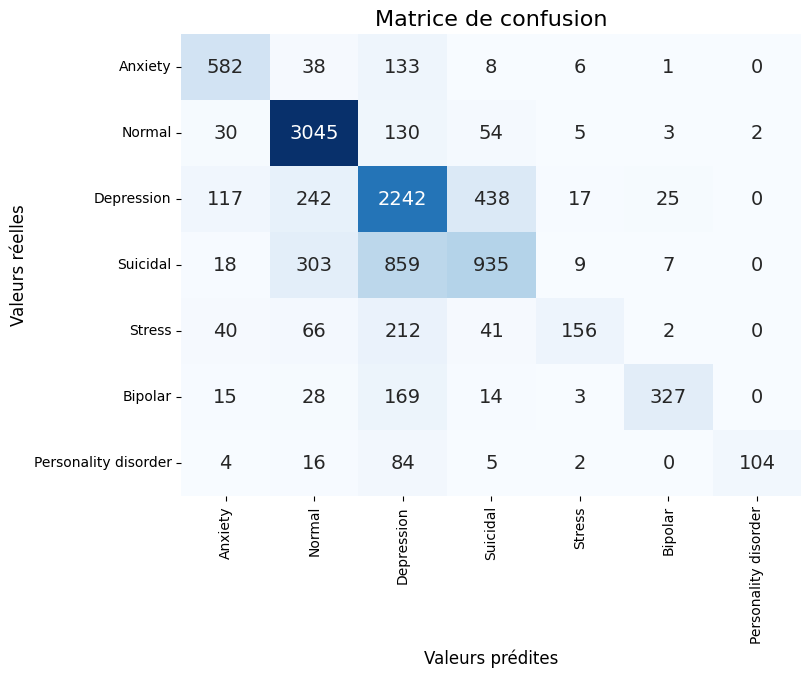

Évaluation du modèle : Logistic Regression
Performance de Logistic Regression avec validation croisée (K-Fold=5) :
Scores obtenus : [0.78673013 0.78963255 0.79050328 0.78673013 0.78376966]
Moyenne des scores : 0.7875

--------------------------------------------------

                      precision    recall  f1-score      support
Anxiety                0.691713  0.815104  0.748356    768.00000
Normal                 0.753676  0.737410  0.745455    556.00000
Depression             0.710580  0.568971  0.631939   3081.00000
Suicidal               0.828595  0.918324  0.871155   3269.00000
Stress                 0.492063  0.720930  0.584906    215.00000
Bipolar                0.481685  0.508704  0.494826    517.00000
Personality disorder   0.615817  0.617550  0.616682   2131.00000
accuracy               0.714150  0.714150  0.714150      0.71415
macro avg              0.653447  0.698142  0.670474  10537.00000
weighted avg           0.713237  0.714150  0.709856  10537.00000


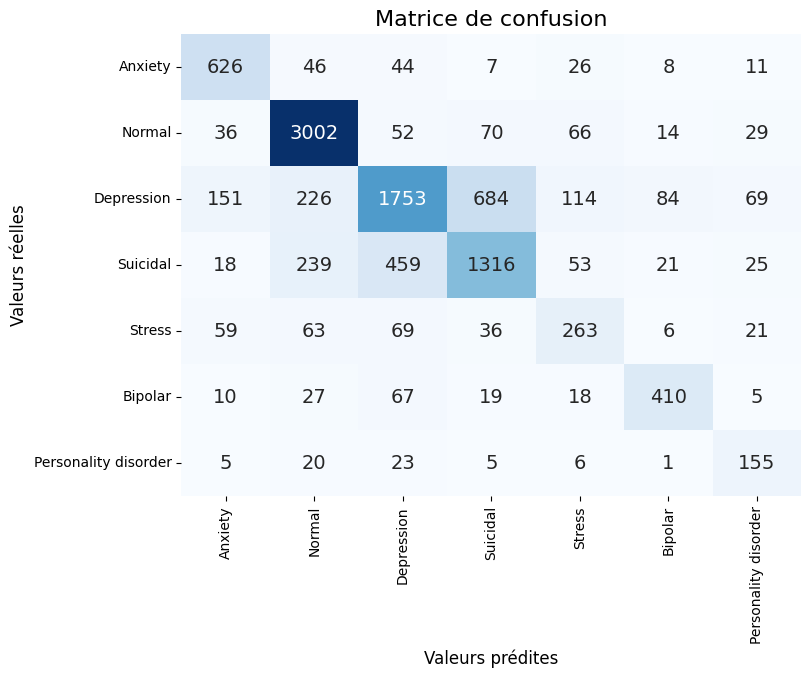

Évaluation du modèle : XGB
Performance de XGB avec validation croisée (K-Fold=5) :
Scores obtenus : [0.80844024 0.81528995 0.81412898 0.80780171 0.81227143]
Moyenne des scores : 0.8116

--------------------------------------------------

                      precision    recall  f1-score       support
Anxiety                0.689455  0.774740  0.729614    768.000000
Normal                 0.779093  0.710432  0.743180    556.000000
Depression             0.676626  0.580656  0.624978   3081.000000
Suicidal               0.814331  0.935148  0.870568   3269.000000
Stress                 0.637306  0.572093  0.602941    215.000000
Bipolar                0.490775  0.514507  0.502361    517.000000
Personality disorder   0.584562  0.557954  0.570948   2131.000000
accuracy               0.703616  0.703616  0.703616      0.703616
macro avg              0.667450  0.663647  0.663513  10537.000000
weighted avg           0.697150  0.703616  0.697641  10537.000000


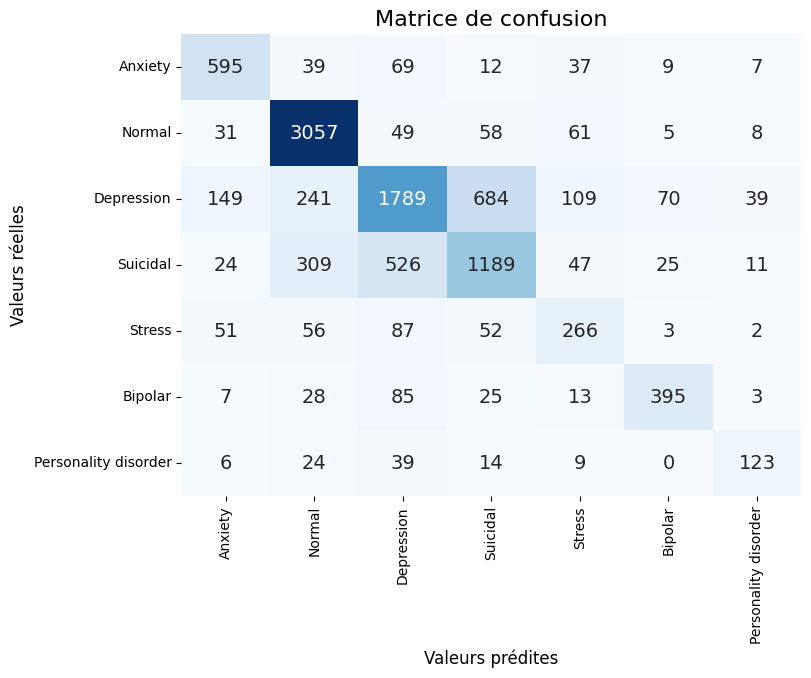

In [82]:
# Evaluer directement le model avec les données d'évaluation

# Appliquer la validation croisée et afficher les résultats
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=101) # Définir le nombre de folds

for name, classifier in classifiers.items():
    print(f"Évaluation du modèle : {name}")

    if name == 'XGB':
        scores = cross_val_score(classifier, X_train_balanced, y_train_balanced, cv=kfold, scoring='accuracy')
    else:
        scores = cross_val_score(classifier, X_train_balanced, y_train_balanced, cv=kfold, scoring='accuracy')

    print(f"Performance de {name} avec validation croisée (K-Fold=5) :")
    print(f"Scores obtenus : {scores}")
    print(f"Moyenne des scores : {scores.mean():.4f}")
    print("\n" + "-"*50 + "\n")

    # Entraîner le modèle
    if name == 'XGB':
        classifier.fit(X_train_balanced, y_train_balanced)
        y_pred = classifier.predict(features_test)
        y_pred = label_encoder.inverse_transform(y_pred)  
    else:
        classifier.fit(features, df_augmented['status'])
        y_pred = classifier.predict(features_test)

    # Rapport de classification
    report_df = metrics_score(y_test, y_pred, classes=df_class['status'].unique())
    print(report_df)

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, classes=df_class['status'].unique())

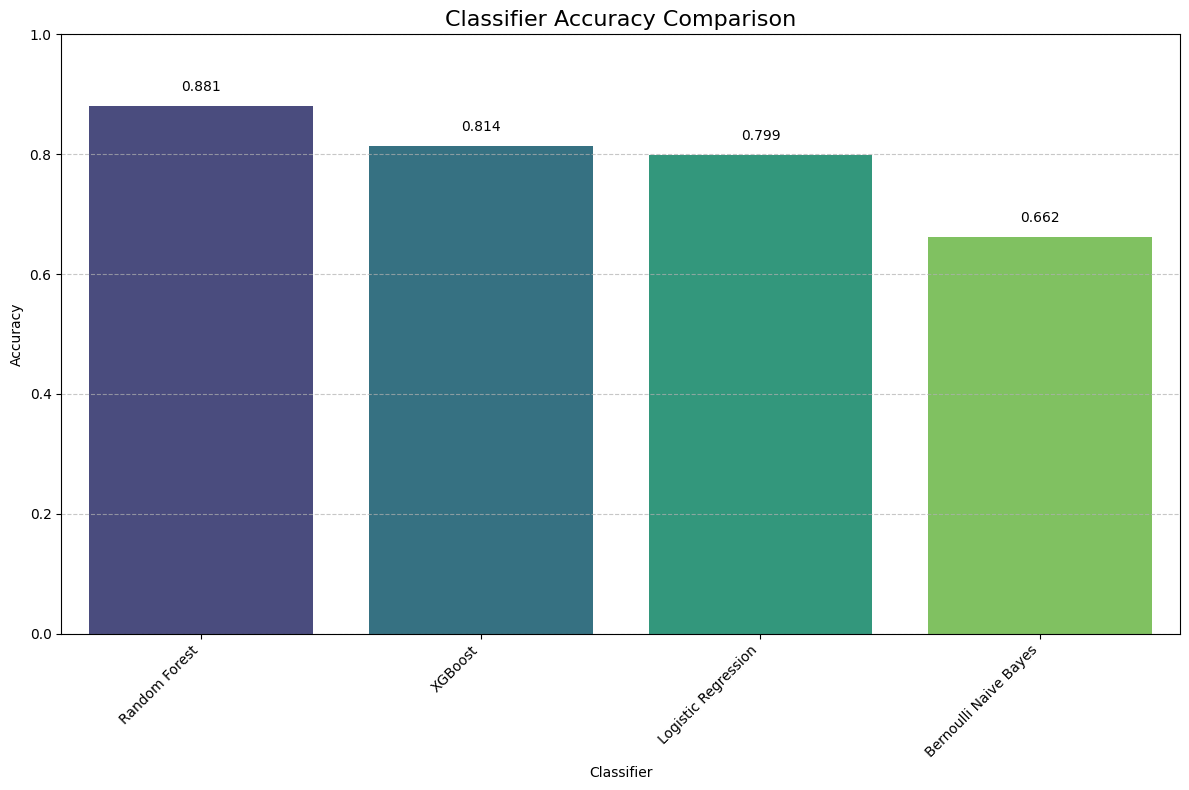

In [40]:
# Histogramme des performances des models (Accuracy)

classifiers = {
    'Random Forest': 0.8812,
    'XGBoost': 0.8140,
    'Logistic Regression': 0.7989,
    'Bernoulli Naive Bayes': 0.6619
}
accuracy = list(classifiers.values())

# Création du DataFrame
accuracies_df = pd.DataFrame({'Classifier': classifiers.keys(), 'Accuracy': accuracy}).sort_values('Accuracy', ascending=False)

# Configuration de la figure
plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', n_colors=len(accuracies_df))

# Création du graphique à barres
sns.barplot(x='Classifier', y='Accuracy', data=accuracies_df, palette=palette)

# Ajout des étiquettes de valeurs
for index, value in enumerate(accuracies_df['Accuracy']):
    plt.text(index, value + 0.02, f'{value:.3f}', ha='center', va='bottom')

# Personnalisation du graphique
plt.title("Classifier Accuracy Comparison", fontsize=16)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()

# **Conclusion**  

Au terme de notre analyse, **Random Forest** s’est distingué comme le modèle le plus performant, avec une précision moyenne de **0.8812** en validation croisée. Il se démarque particulièrement par sa capacité à bien gérer les classes déséquilibrées, notamment pour détecter les messages liés au **suicidal** (F1-score de **0.8697**). Ces performances solides en font le choix privilégié pour cette tâche de classification.  

Les autres modèles ont également montré des résultats intéressants :  

- **XGBoost** et **Logistic Regression** ont affiché des performances comparables, avec des **F1-scores élevés** pour les classes majoritaires comme *suicidal* (~**0.87**). Cependant, ils rencontrent des difficultés avec les classes minoritaires (*Bipolar*, *Personality disorder*).  
- **Bernoulli Naive Bayes**, bien que rapide, présente les performances les plus faibles, surtout sur les classes complexes, ce qui le rend moins adapté à ce problème.  

### **Axes d'amélioration**  

#### 🔹 **Gestion des classes minoritaires**  
Bien que des techniques de rééquilibrage comme **SMOTE** aient été utilisées, d’autres approches, telles que des **méthodes d’oversampling plus avancées** ou l’**utilisation de modèles spécialisés**, pourraient être explorées.  

#### 🔹 **Optimisation des hyperparamètres**  
Un réglage plus approfondi des **hyperparamètres de Random Forest et XGBoost**, en testant différentes configurations via **GridSearchCV** ou **Bayesian Optimization**, pourrait encore améliorer leurs performances.  

#### 🔹 **Feature Engineering**  
Une **révision du pipeline de prétraitement** et l’intégration de nouvelles **features** pourraient également contribuer à une meilleure performance des modèles.  

#### **Conclusion finale**  
**Random Forest** s’impose comme le modèle le plus efficace pour cette classification. Toutefois, des améliorations ciblées sur les classes minoritaires, l’optimisation des hyperparamètres et le prétraitement des données pourraient encore renforcer la robustesse du système.  


## 2.  Analyse des Sentiments avec TextBlob

Dans cette section, nous allons utiliser **TextBlob** pour analyser chaque phrase de notre ensemble de données. TextBlob est un outil puissant de traitement du langage naturel qui calcule la **polarité** des phrases. La polarité se décompose en deux éléments principaux : **polarité** et **subjectivité**.

### 1. Polarité
La **polarité** est une valeur numérique qui identifie si une phrase exprime un sentiment **positif** ou **négatif**. Elle varie entre **-1 et 1**, où :

- **1** indique un **sentiment très positif** ou une affirmation basée sur des **faits** plutôt que des émotions.  
- **-1** reflète un **sentiment très négatif** ou une affirmation sans fondement factuel.

En résumé :  
- Plus la polarité est proche de **1**, plus le sentiment est positif.  
- Plus elle est proche de **-1**, plus le sentiment est négatif.

### 2. Subjectivité
La **subjectivité** mesure dans quelle mesure une phrase reflète des **opinions personnelles** ou des **émotions**, par opposition à des **faits objectifs**. Ses valeurs oscillent entre **0 et 1** :

- **1** indique une forte subjectivité, c’est-à-dire une phrase fondée sur des **opinions** ou des **émotions**.  
- **0** suggère une forte objectivité, indiquant une phrase basée sur des **faits**.

### Résumé
Il est important de noter que TextBlob ne vérifie pas la véracité des faits mentionnés dans une phrase. Il se base uniquement sur des indices linguistiques pour estimer la subjectivité.

La polarité évalue le ton émotionnel (positif ou négatif) d’une phrase, tandis que la subjectivité détermine si l’énoncé repose sur des opinions ou des faits. Ces deux métriques combinées nous permettent d’obtenir une analyse plus riche des sentiments véhiculés dans les textes. Cependant, il est essentiel de garder à l’esprit que TextBlob ne peut pas capturer des nuances complexes comme l’ironie, le sarcasme ou le contexte culturel, ce qui limite son interprétation dans certains cas.

In [61]:
# Forme du jeu de donnée

df_Textbolb.shape

(52681, 3)

In [62]:
# Tokenisation, Pos_tagging et Lemmatisation
import spacy

nlp = spacy.load('en_core_web_sm') # Charger le modèle spaCy

# Définir une fonction pour la Tokenisation, Pos_tagging et Lemmatisation
def lemmatize_text(text):
    doc = nlp(text)  # Traiter le texte avec spaCy
    # Remplacer les tokens par leurs lemmes
    return ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc])

In [63]:
# Appliquer Tokenisation, Pos_tagging et Lemmatisation sur la colonne "statement"

df_Textbolb['statement'] = df_Textbolb['statement'].apply(lemmatize_text)

In [64]:
# Afficher les 05 premieres lignes

df_Textbolb.head()

statement   status  \
0                                                        gosh  Anxiety   
1             trouble sleep confused mind restless heart tune  Anxiety   
2  wrong back dear forward doubt stay restless restless place  Anxiety   
3                      shift focus something else still worry  Anxiety   
4                                restless restless month mean  Anxiety   

                                      polarité  
0                                   (0.0, 0.0)  
1  (-0.30000000000000004, 0.44999999999999996)  
2                                (-0.25, 0.45)  
3                                   (0.0, 0.0)  
4                            (-0.3125, 0.6875)

In [65]:
# Generer la polirité pour chaque sentiment
from textblob import TextBlob
df_Textbolb['polarité'] = df_Textbolb['statement'].apply(lambda tweet: TextBlob(tweet).sentiment)
df_Textbolb.head()

statement   status  \
0                                                        gosh  Anxiety   
1             trouble sleep confused mind restless heart tune  Anxiety   
2  wrong back dear forward doubt stay restless restless place  Anxiety   
3                      shift focus something else still worry  Anxiety   
4                                restless restless month mean  Anxiety   

                                      polarité  
0                                   (0.0, 0.0)  
1  (-0.30000000000000004, 0.44999999999999996)  
2                                (-0.25, 0.45)  
3                                   (0.0, 0.0)  
4                            (-0.3125, 0.6875)

*** On observe que la variable polarité contient a la fois les valeurs de subjectivité et de polarité. Elle doit donc etre divisé en deux autres variable: subjectivité et polarité.***

In [43]:
# Division de la variable polarité en polarity et subjectivity

sentiment_series = df_Textbolb['polarité'].to_list()
columns = ['polarity', 'subjectivity']
df_bolb = pd.DataFrame(sentiment_series, columns=columns, index=df.index)
df_bolb = df_bolb.round(2)
df_bolb.head()

polarity  subjectivity
0      0.00          0.00
1     -0.30          0.45
2     -0.25          0.45
3      0.00          0.00
4     -0.31          0.69

In [44]:
# Cocatenation des deux jeu de donnée df_forest et df_bolb

result = pd.concat([df_Textbolb, df_bolb], axis = 1)
result = result[['statement', 'status','polarity', 'subjectivity']]
result.head()


statement   status  \
0                                                        gosh  Anxiety   
1             trouble sleep confused mind restless heart tune  Anxiety   
2  wrong back dear forward doubt stay restless restless place  Anxiety   
3                      shift focus something else still worry  Anxiety   
4                                restless restless month mean  Anxiety   

   polarity  subjectivity  
0      0.00          0.00  
1     -0.30          0.45  
2     -0.25          0.45  
3      0.00          0.00  
4     -0.31          0.69

In [45]:
# Classification binaire en fonction de la polarité

result.loc[result['polarity'] > 0.3, 'label'] = 'Positif'  # Si polarité > 0.3, label 'Positif'
result.loc[result['polarity'] <= 0.3, 'label'] = 'Négatif'  # Si polarité < 0.3, label 'Négatif'

In [46]:
# 05 premieres lignes

result.sample(frac=1).head()

statement  \
31468                                                                                                                                                                                                                                                                                                                       
51401  tend love problem never possible forced situation repeat exposure case become familiar slowly open span week downright disturb many happen depress opportunity primary environment occur school desperate point despite everything normally strive great career money success think join army meet holy shit wrong   
41349                                                                                                                                                                                             chronic depression get write step step kill inside trap pain smth concrete physical traumatic scene anything blood head   
13156                                                                                                   control moment hung belt closet lean intend kill sort impulse thing future reference fully mentally stay suffocate finally snap vision go fuzzy feel pass enough hospital since intend kill wrong scared hospital   
36239                                                                                                                                                                                                                                                                 please weed board adult cartoon tired live bad plea   

                     status  polarity  subjectivity    label  
31468                Normal      0.00          0.00  Négatif  
51401  Personality disorder      0.10          0.57  Négatif  
41349            Depression      0.08          0.22  Négatif  
13156              Suicidal     -0.12          0.55  Négatif  
36239              Suicidal     -0.22          0.54  Négatif

### En conclusion  

Rappelons que: 

- L’analyse des sentiments avec TextBlob permet d’évaluer la polarité (positive, négative ou neutre) et la subjectivité des messages, mais elle ne différencie pas directement les messages factuels des messages émotionnels.

- Les messages factuels, qui s’appuient sur des faits concrets et observables, peuvent exprimer une polarité positive ou négative selon leur contenu. Par exemple, une personne déclarant être anxieuse à l’approche d’un examen s’appuie sur une situation réelle, ce qui pourrait être interprété comme un message à polarité négative. Cependant, certains messages factuels peuvent être négatifs sans preuves tangibles, comme une accusation : "Mon voisin a volé du riz." Ce type de message peut être factuel du point de vue de l’émetteur, mais sans preuve, il reste sujet à interprétation.

- À l’inverse, les messages émotionnels reflètent davantage un ressenti subjectif, influencé par des émotions, sans nécessairement s’appuyer sur des éléments vérifiables. Par exemple, une personne peut exprimer de l’empathie envers quelqu’un en dépression, sans que cela reflète son propre état clinique.

- Cependant, cette approche ne permet pas d’établir une vérité absolue. TextBlob, comme tout outil d’analyse des sentiments, a ses limites : il ne capture pas toujours le contexte, l’ironie ou les nuances complexes du langage humain. De plus, il peut attribuer une polarité négative à un message basé sur des faits sans tenir compte du degré de vérifiabilité de ces faits.

- En tenant compte de ces limites, cette méthode reste utile pour évaluer, en moyenne, la tonalité et la subjectivité des messages, tout en explorant la relation entre émotion, langage et réalité.

## 2.  Reseau de neurone avec model pré-entrainé (glove) pour la numérisation du texte

In [47]:
# Affichage des 05 premiere lignes

df_DeepLearning.head()

statement   status
0                                                        gosh  Anxiety
1          trouble sleeping confused mind restless heart tune  Anxiety
2  wrong back dear forward doubt stay restless restless place  Anxiety
3                  shifted focus something else still worried  Anxiety
4                                restless restless month mean  Anxiety

In [48]:
# Tokenization train_df

texts = df_DeepLearning['statement'].values  # Les textes des patients
labels = df_DeepLearning['status'].values  # Les états des patients

# Conversion des étiquettes  
label_mapping = {
    'Normal': 0,
    'Depression': 1,
    'Suicidal': 2,
    'Anxiety': 3,
    'Bipolar': 4,
    'Stress': 5,
    'Personality disorder': 6
}
labels = df_DeepLearning['status'].map(label_mapping).values


# Initialisation des parametres

maxlen = 100 # Utiliser les 100 premiers mots dans un commentaire
training_samples = 200 # 200 entrées pour entrainer le model
validation_samples = 10000  # 10000 entrées pour l'évaluation
max_words = 10000 # Par exemple, prendre les 10 000 mots les plus fréquents

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Padding
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('shape of data tensor', data.shape)
print('shape of label tensor:', labels.shape)

# Rearranger aléatoirement les données
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Séparation des données en ensemble d'entrainement et ensemble de validation
X_train = data[:training_samples] # 200 premier echantillons pour l'entrainement
y_train = labels[:training_samples] # 200 premier labels pour l'entrainement
X_val = data[training_samples: training_samples + validation_samples] # 10000 premier échantillons pour l'evaluation
y_val = labels[training_samples: training_samples + validation_samples] # 10000 labels pour l'évaluation

Found 8887 unique tokens.
shape of data tensor (52681, 100)
shape of label tensor: (52681,)


In [52]:
# Téléchargement  du  model pré-entrainé  Glove

# Chemin vers les embeddings GloVe
glove_file = "C:/Users/claud/Documents/Machine learning MIT/Sentiment Analysis/glove.6B/glove.6B.100d.txt"

# Chargement des embeddings GloVe
embeddings_index = {}
f = open(glove_file, encoding="utf8")  
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [53]:
# Tester si le charement a été bien éffectué

embeddings_index['good']

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [54]:
# initialisation de la  matrice d'embedding pour le modèle 

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [55]:
# Creation du Model de Deep Learning
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(maxlen,))) 
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         320,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,319 (5.04 MB)

 Trainable params: 1,321,319 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.layers[0].set_weights([embedding_matrix]) # Initialisation des poids de la couche d'embedding :
model.layers[0].trainable = False # Empêcher l’entraînement de la couche d’embedding :

In [57]:
#Compiler le modele

model.compile(
    loss='categorical_crossentropy',  # 'categorical_crossentropy' pour une classification multi-classes
    optimizer = 'Adam', 
    metrics=['accuracy']  # Mesure la précision pendant l'entraînement
)


In [58]:
# Convertir les labels en format one-hot

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=7)  # 7 classes
y_val_one_hot = to_categorical(y_val, num_classes=7)  # 7 classes


In [59]:
# Entrainement

history = model.fit(
    X_train,  # Données d'entraînement
    y_train_one_hot,  # Labels d'entraînement en format one-hot
    epochs=10,  # Nombre d'époques
    batch_size=32,  # Taille du batch
    validation_data=(X_val, y_val_one_hot)
  
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.2919 - loss: 1.7239 - val_accuracy: 0.2888 - val_loss: 1.6595
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.4400 - loss: 1.4146 - val_accuracy: 0.2293 - val_loss: 1.6159
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5383 - loss: 1.3319 - val_accuracy: 0.3683 - val_loss: 1.5534
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6778 - loss: 1.1290 - val_accuracy: 0.4422 - val_loss: 1.5136
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7848 - loss: 0.9752 - val_accuracy: 0.4520 - val_loss: 1.4983
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7468 - loss: 0.9397 - val_accuracy: 0.4661 - val_loss: 1.4713
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8152 - loss: 0.7919 - val_accuracy: 0.5019 - val_loss: 1.4461
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.7917 - loss: 0.8131 - val_accuracy: 0.4895 - val_loss:

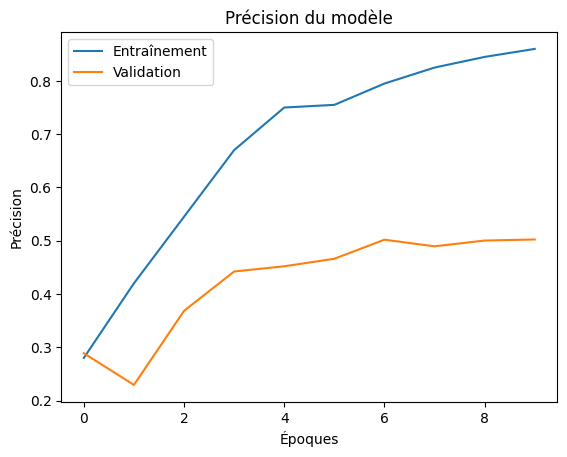

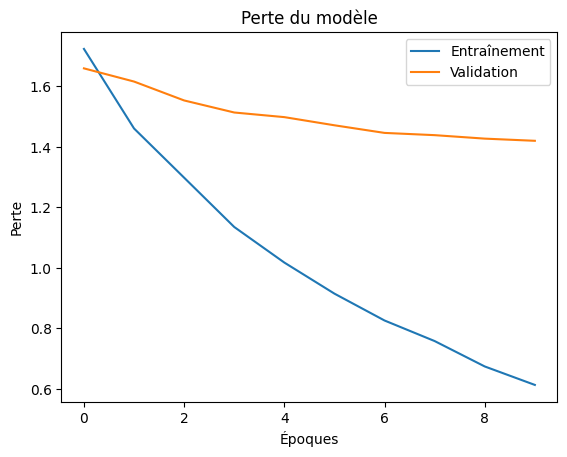

In [60]:
# Afficher les métrics

import matplotlib.pyplot as plt

# Affichage de la précision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend(['Entraînement', 'Validation'])
plt.show()

# Affichage de la perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend(['Entraînement', 'Validation'])
plt.show()


### Performance du modèle

- **Précision d'entraînement** : 100% à partir de la 6e époque.
- **Perte d'entraînement** : Réduction constante jusqu'à 0.13.
- **Précision de validation** : Fluctue entre 49% et 53%.
- **Perte de validation** : Reste élevée, atteignant des valeurs supérieures à 1.5.

Ces résultats sont un signe flagrant de **overfitting**, où le modèle se surajuste aux données d'entraînement sans 
réussir à bien généraliser sur les données de validation.

Les résultats obtenus sont limités par plusieurs facteurs. Tout d'abord, le manque de données avec seulement 200 
échantillons pour l'entraînement empêche le modèle de capter des schémas complexes. Le déséquilibre entre entraînement 
et validation (200 échantillons d'entraînement contre 10 000 pour la validation) cause un biais dans l'évaluation. Enfin,
même avec l'utilisation de vecteurs de mots pré-entraînés comme GloVe, le modèle ne peut pas exploiter pleinement 
ces embeddings en raison du manque de données suffisantes. 
Pour améliorer les performances, une augmentation du jeu de données et un meilleur équilibre entre les ensembles 
d'entraînement et de validation sont nécessaires.


# Mise en production

In [32]:
# Classe de traitement

import pandas as pd

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convertir en Series si X est une liste
        if isinstance(X, list):
            X = pd.Series(X)
        
        X_cleaned = X.astype(str)  # Maintenant, ça fonctionne !
        
        # Étendre les contractions
        X_cleaned = X_cleaned.apply(contractions.fix)

        # Supprimer les chiffres
        X_cleaned = X_cleaned.apply(lambda x: re.sub(r'\d+', '', x))

        # Convertir en minuscule
        X_cleaned = X_cleaned.str.lower()

        # Supprimer les balises HTML
        X_cleaned = X_cleaned.apply(lambda x: re.sub(r'<.*?>', ' ', x))

        # Supprimer les ponctuations et caractères spéciaux
        X_cleaned = X_cleaned.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

        # Tokenization et Lemmatization
        X_cleaned = X_cleaned.apply(lambda x: " ".join([self.lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

        # Supprimer les stopwords
        X_cleaned = X_cleaned.apply(lambda x: " ".join([word for word in x.split() if word not in self.stopwords]))

        # Supprimer les espaces multiples
        X_cleaned = X_cleaned.apply(lambda x: re.sub(r'\s+', ' ', x).strip())

        return X_cleaned



In [36]:
# Définition de la pipeline 

steps = [
    ("Netoyage", TextPreprocessor()), 
    ("Vectorizer", TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))),
    ("Classifier", RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2, 
        n_estimators=100,
        class_weight='balanced',
        random_state=101))
]

# Création du pipeline
pipeline = Pipeline(steps)

# Entraîner la pipeline
pipeline.fit(df_augmented.statement, df_augmented.status)

# Afficher le pipeline
from sklearn import set_config
set_config(display="diagram")  
pipeline

Pipeline(steps=[('Netoyage', TextPreprocessor()),
                ('Vectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('Classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [37]:
# Sauvegarder le pipeline dans un fichier .pkl
import joblib

joblib.dump(pipeline, "sentiment_analysis_pipeline.pkl")
print("Pipeline sauvegardé avec succès !")


Pipeline sauvegardé avec succès !


In [38]:
# Charger le pipeline depuis le fichier et faire une prediction
loaded_pipeline = joblib.load("sentiment_analysis_pipeline.pkl")

# Vérifier si le pipeline fonctionne
sample_text = ["I keep worrying about whether I’ll be able to finish everything on time, and it feels like there’s always something I’m forgetting."]
prediction = loaded_pipeline.predict(sample_text)
print("Prédiction :", prediction)


Prédiction : ['Anxiety']


In [39]:
# Tester une prediction d'un cas Normal

sample_text = ["I feel grateful for the little things in life, and I'm hopeful for what the future holds."]

prediction = loaded_pipeline.predict(sample_text)
print("Prédiction :", prediction)

Prédiction : ['Normal']


In [42]:
# Tester une prediction d'un cas de stress

sample_text = ["I feel overwhelmed and stress by everything I have to do, and I can't seem to keep up."]

prediction = loaded_pipeline.predict(sample_text)
print("Prédiction :", prediction)



Prédiction : ['Stress']
